# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [69]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

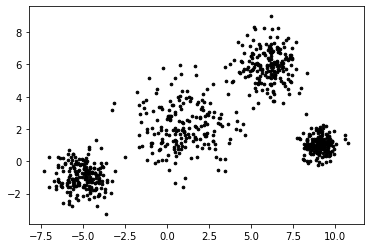

In [70]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

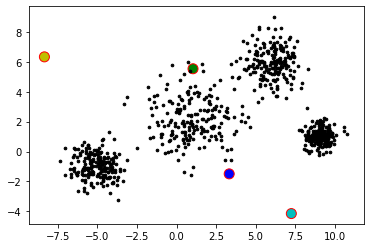

[1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [71]:
std = np.std(data)
mean = np.mean(data)

np.random.seed(6)
k = 4

centres  = np.random.randn(k,2)*std + mean


plt.scatter(centres[:,0], centres[:,1], s=100, c=['g','b','y','c'],edgecolors='r')
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()


distance=np.zeros((800,k))
for i in range(k): 
     distance[:,i] = np.linalg.norm(data - centres[i],axis=1)
cluster = np.argmin(distance, axis = 1)
print(cluster)

## 2. Visualise the clustering results in each iteration

I implemented the process of k-means clustering. Each iteration is a seperated, assigning each data point to the closest centre, then updating the cluster centres based on the mean of the clusters that are closest to them, then plot the new clusters.
I did this a total of 6 times with the final iteration (6th) being identical to the 5th, from this we know that the centroids have found the centers of the clusters



## Setting the data colour to match its nearest center

In [72]:
distance=np.zeros((800,k))
for i in range(k): 
     distance[:,i] = np.linalg.norm(data - centres[i],axis=1)
cluster = np.argmin(distance, axis = 1)

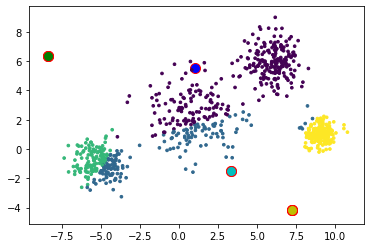

In [73]:
colmap = {0: 'b', 1: 'c', 2: 'g', 3: 'y'}
for i in range(k):
    plt.scatter(centres[i:,0], centres[i:,1], s=100, c = colmap[i], edgecolors='r')

plt.scatter(data[:,0], data[:,1], s=7, c=cluster)


## Moving the centers such that they are in the center of all the points that share their colour

In [74]:
meanStorageX = []
meanStorageY = []

new_centres = np.zeros((4,2))              
def update(k):
    for i in range(len(new_centres)):
        meanStorageX.clear()
        meanStorageY.clear()
        for j in range(len(data)):
            if(cluster[j] == i):
                meanStorageX.append(data[j][0])
                meanStorageY.append(data[j][1])
                new_centres[i:,0] = np.mean(meanStorageX)
                new_centres[i:,1] = np.mean(meanStorageY)
    return k

In [75]:
update(new_centres)

array([[ 3.99620775,  4.82013001],
       [-1.08109426, -0.14715591],
       [-5.54024032, -0.68960389],
       [ 9.09422694,  1.02197195]])

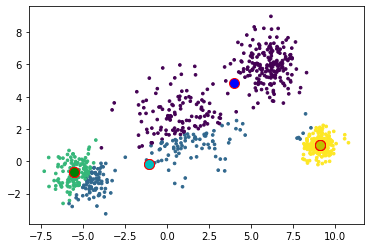

In [76]:
colmap = {0: 'b', 1: 'c', 2: 'g', 3: 'y'}

plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 2: Changing the colours of the points to match the new nearest cell

In [77]:
distance2=np.zeros((800,k))
for i in range(k): 
     distance2[:,i] = np.linalg.norm(data - new_centres[i],axis=1)
newcluster = np.argmin(distance2, axis = 1)
cluster = newcluster


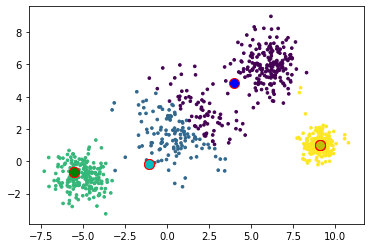

In [78]:
colmap = {0: 'b', 1: 'c', 2: 'g', 3: 'y'}

plt.scatter(data[:,0], data[:,1], s=7, c=cluster2)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')


## Iteration 2: Moving the centers to the new means

In [79]:
update(new_centres)

print(new_centres)


[[ 4.90132371  5.15030358]
 [ 0.24633035  1.5433697 ]
 [-5.0796739  -0.95753889]
 [ 9.05236058  1.0794625 ]]


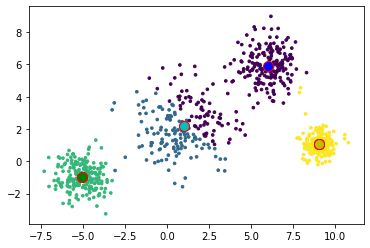

In [80]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster2)

for i in range(k):
    plt.scatter(new_centres2[i:,0], new_centres2[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 3: Changing the colours


In [81]:
distance3=np.zeros((800,k))
for i in range(k): 
     distance3[:,i] = np.linalg.norm(data - new_centres[i],axis=1)
newcluster = np.argmin(distance3, axis = 1)
cluster = newcluster

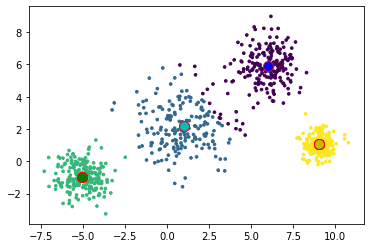

In [82]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres2[i:,0], new_centres2[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 3: Moving centroids


In [85]:
update(new_centres)            
print(new_centres)


[[ 5.76438788  5.71757292]
 [ 0.77137496  2.03200622]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


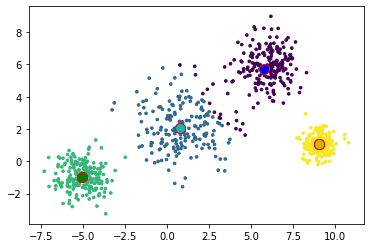

In [86]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 4 Both changing colour and moving centroids

In [87]:
distance4=np.zeros((800,k))
for i in range(k): 
     distance4[:,i] = np.linalg.norm(data - new_centres[i],axis=1)
newcluster = np.argmin(distance4, axis = 1)
cluster = newcluster

In [88]:
update(new_centres)            

print(new_centres)

[[ 5.97243759  5.88784838]
 [ 0.93973117  2.13879788]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


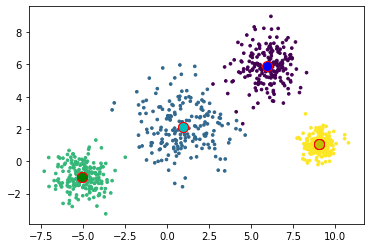

In [89]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 5 


In [90]:
distance5=np.zeros((800,k))
for i in range(k): 
     distance5[:,i] = np.linalg.norm(data - new_centres[i],axis=1)
newcluster = np.argmin(distance5, axis = 1)
cluster = newcluster

In [91]:
update(new_centres)            
print(new_centres)

[[ 6.0053298   5.92528865]
 [ 0.98297825  2.15787959]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


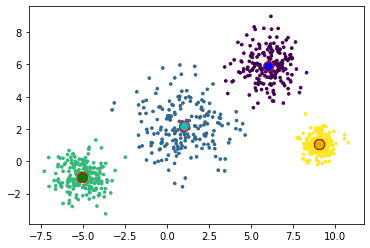

In [92]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')

## Iteration 6

In [93]:
distance6=np.zeros((800,k))
for i in range(k): 
     distance6[:,i] = np.linalg.norm(data - new_centres[i],axis=1)
newcluster = np.argmin(distance6, axis = 1)
cluster = newcluster

In [94]:
update(new_centres)            
print(new_centres)

[[ 6.0053298   5.92528865]
 [ 0.98297825  2.15787959]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


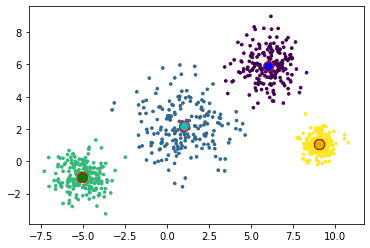

In [95]:
plt.scatter(data[:,0], data[:,1], s=7, c=cluster)

for i in range(k):
    plt.scatter(new_centres[i:,0], new_centres[i:,1], s=100, c = colmap[i], edgecolors='r')

We can see that at the 6th Iteration the cells no longer change, that is because the centroids have found the clusters and are in the centers. 